In [297]:
import pandas as pd
import matplotlib.pyplot as plt

In [298]:
excel_file = 'internet.xlsx' 

xls = pd.ExcelFile(excel_file)
x=0
for sheet_name in xls.sheet_names:
  x+=1
  df = pd.read_excel(excel_file, sheet_name=sheet_name)
  nombre_hoja = sheet_name
  nombrelimpio = nombre_hoja.replace(' ', '_').replace("-", "_").replace("%", "p")
  globals()[f'df_{nombrelimpio}'] = df  # Crea una variable global con el nombre de la hoja
  print(f'{x} df_{nombrelimpio}')

1 df_Acc_vel_loc_sinrangos
2 df_Velocidad_sin_Rangos
3 df_Accesos_tecnologia_localidad
4 df_Velocidad_p_por_prov
5 df_Totales_VMD
6 df_Totales_Accesos_Por_Tecnología
7 df_Accesos_Por_Tecnología
8 df_Penetración_poblacion
9 df_Penetracion_hogares
10 df_Penetracion_totales
11 df_Totales_Accesos_por_velocidad
12 df_Accesos_por_velocidad
13 df_Dial_BAf
14 df_Totales_Dial_BAf
15 df_Ingresos_


Como se puede notar se generaron 15 Dataframes, 1 por cada hoja del excel.

Tablas a descartar:  
2 velocidad_sin_rangos (no tiene el detalle de localidad)  
7 Accesos_Por_Tecnologia (se resume en Totales_Accesos_Por_Tecnologia)  
8 Penetracion_poblacion (se opta por representar penetracion_totales)  
9 Penetracion_hogares (se opta por representar penetracion_totales)  
11 Totales Accesos por velocidad (se extrae desde ACC_vel_sinrangos, solo tiene +30mbps)  
12 Accesos por velocidad (tiene solo +30mbps)  
13 Dial_BAF (Dial up es tecnologia antigua)  
14 Totales_Dial_BAF  


Quedando:  
1 df_Acc_vel_loc_sinrangos  
3 df_Accesos_tecnologia_localidad  
4 df_Velocidad_p_por_prov  
5 df_Totales_VMD  
6 df_Totales_Accesos_Por_Tecnología  
10 df_Penetracion_totales  
15 df_Ingresos_  

# 1_ Analisis del dataframe Acc_vel_loc_sinrangos

In [299]:
df_Acc_vel_loc_sinrangos.describe()

,Otros,"0,256 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",1 Mbps,"1,5 Mbps",2 Mbps,"2,2 Mbps","2,5 Mbps",...,680 Mbps,700 Mbps,800 Mbps,850 Mbps,900 Mbps,999 Mbps,1000 Mbps,1024 Mbps,4000 Mbps,10000 Mbps
count,1030.000000,36.000000,642.000000,525.000000,284.000000,872.000000,15.000000,677.000000,1.0,4.000000,...,1.0,4.0,4.000000,1.0,1.0,17.000000,420.000000,2.0,1.0,2.000000
mean,318.614563,2.944444,42.978193,2.100952,39.588028,66.642202,132.533333,101.428360,18.0,156.500000,...,5.0,1.0,153.500000,1.0,110.0,3.352941,609.683333,1.0,1.0,5.000000
std,2964.939611,5.806127,985.466627,4.684645,118.563946,222.345674,291.222268,278.821468,NaN,212.528429,...,NaN,0.0,273.381906,NaN,NaN,5.700232,3431.387543,0.0,NaN,5.656854
min,-15.000000,1.000000,0.000000,1.000000,1.000000,0.000000,7.000000,1.000000,18.0,21.000000,...,5.0,1.0,1.000000,1.0,110.0,1.000000,1.000000,1.0,1.0,1.000000
25%,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,31.000000,4.000000,18.0,35.250000,...,5.0,1.0,10.750000,1.0,110.0,1.000000,17.000000,1.0,1.0,3.000000
50%,6.000000,1.000000,1.000000,1.000000,9.500000,10.000000,47.000000,21.000000,18.0,66.500000,...,5.0,1.0,25.000000,1.0,110.0,2.000000,139.500000,1.0,1.0,5.000000
75%,48.000000,2.000000,2.000000,1.000000,28.000000,40.250000,75.000000,77.000000,18.0,187.750000,...,5.0,1.0,167.750000,1.0,110.0,3.000000,498.000000,1.0,1.0,7.000000
max,87722.000000,31.000000,24968.000000,61.000000,1307.000000,4111.000000,1170.000000,3530.000000,18.0,472.000000,...,5.0,1.0,563.000000,1.0,110.0,25.000000,68405.000000,1.0,1.0,9.000000


In [300]:
for i, column in enumerate(df_Acc_vel_loc_sinrangos.columns):
  print(f"{i}: {column}")


0: Provincia
1: Partido
2: Localidad
3: Link Indec
4: Otros
5: 0,256 Mbps
6: 0,5 Mbps
7: 0,512 Mbps
8: 0,75 Mbps
9: 1 Mbps
10: 1,5 Mbps
11: 2 Mbps
12: 2,2 Mbps
13: 2,5 Mbps
14: 3 Mbps
15: 3,3 Mbps
16: 3,5 Mbps
17: 4 Mbps
18: 4,5 Mbps
19: 5 Mbps
20: 6 Mbps
21: 6,4 Mbps
22: 7 Mbps
23: 7,5 Mbps
24: 8 Mbps
25: 9 Mbps
26: 10 Mbps
27: 10,1 Mbps
28: 10,2 Mbps
29: 11 Mbps
30: 12 Mbps
31: 12,3 Mbps
32: 13 Mbps
33: 14 Mbps
34: 15 Mbps
35: 16 Mbps
36: 17 Mbps
37: 18 Mbps
38: 20 Mbps
39: 20,5 Mbps
40: 21 Mbps
41: 22 Mbps
42: 23 Mbps
43: 24 Mbps
44: 25 Mbps
45: 25,1 Mbps
46: 25,5 Mbps
47: 26 Mbps
48: 27 Mbps
49: 30 Mbps
50: 31 Mbps
51: 32 Mbps
52: 35 Mbps
53: 36 Mbps
54: 40 Mbps
55: 41 Mbps
56: 45 Mbps
57: 48 Mbps
58: 49 Mbps
59: 50 Mbps
60: 50,1 Mbps
61: 50,25 Mbps
62: 51 Mbps
63: 55 Mbps
64: 59 Mbps
65: 60 Mbps
66: 61 Mbps
67: 65 Mbps
68: 66 Mbps
69: 70 Mbps
70: 75 Mbps
71: 80 Mbps
72: 85 Mbps
73: 90 Mbps
74: 95 Mbps
75: 98 Mbps
76: 100 Mbps
77: 100,1 Mbps
78: 100,25 Mbps
79: 105 Mbps
80: 110 Mbp

El dataframe contiene 125 columnas, se decide agrupar en las velocides: hasta_100mbps, 100_a_300Mbps , 300_a_500mbps, mas_de_500mbps 

In [ ]:
#defino las columnas
# h_100 = [5,77]
# d100_a_300 = [77,103]
# d300_a_500 = [103,111]
# mas_500 = [111,124]

### Tratamiento de NANs

Para el caso de la suma entre columnas, la funcion considera los NAN como ceros, por lo que no es necesario un tratamiento particular para estos NANs.

In [301]:
#sumo las columnas
df_Acc_vel_loc_sinrangos['hasta_100mbps'] = df_Acc_vel_loc_sinrangos.iloc[:, 5:77].sum(axis=1)
df_Acc_vel_loc_sinrangos['de_100_a_300mbps'] = df_Acc_vel_loc_sinrangos.iloc[:, 77:103].sum(axis=1)
df_Acc_vel_loc_sinrangos['de_300_a_500mbps'] = df_Acc_vel_loc_sinrangos.iloc[:, 103:111].sum(axis=1)
df_Acc_vel_loc_sinrangos['mas_de_500mbps'] = df_Acc_vel_loc_sinrangos.iloc[:, 111:125].sum(axis=1)

In [302]:
for i, column in enumerate(df_Acc_vel_loc_sinrangos.columns):
  print(f"{i}: {column}")

0: Provincia
1: Partido
2: Localidad
3: Link Indec
4: Otros
5: 0,256 Mbps
6: 0,5 Mbps
7: 0,512 Mbps
8: 0,75 Mbps
9: 1 Mbps
10: 1,5 Mbps
11: 2 Mbps
12: 2,2 Mbps
13: 2,5 Mbps
14: 3 Mbps
15: 3,3 Mbps
16: 3,5 Mbps
17: 4 Mbps
18: 4,5 Mbps
19: 5 Mbps
20: 6 Mbps
21: 6,4 Mbps
22: 7 Mbps
23: 7,5 Mbps
24: 8 Mbps
25: 9 Mbps
26: 10 Mbps
27: 10,1 Mbps
28: 10,2 Mbps
29: 11 Mbps
30: 12 Mbps
31: 12,3 Mbps
32: 13 Mbps
33: 14 Mbps
34: 15 Mbps
35: 16 Mbps
36: 17 Mbps
37: 18 Mbps
38: 20 Mbps
39: 20,5 Mbps
40: 21 Mbps
41: 22 Mbps
42: 23 Mbps
43: 24 Mbps
44: 25 Mbps
45: 25,1 Mbps
46: 25,5 Mbps
47: 26 Mbps
48: 27 Mbps
49: 30 Mbps
50: 31 Mbps
51: 32 Mbps
52: 35 Mbps
53: 36 Mbps
54: 40 Mbps
55: 41 Mbps
56: 45 Mbps
57: 48 Mbps
58: 49 Mbps
59: 50 Mbps
60: 50,1 Mbps
61: 50,25 Mbps
62: 51 Mbps
63: 55 Mbps
64: 59 Mbps
65: 60 Mbps
66: 61 Mbps
67: 65 Mbps
68: 66 Mbps
69: 70 Mbps
70: 75 Mbps
71: 80 Mbps
72: 85 Mbps
73: 90 Mbps
74: 95 Mbps
75: 98 Mbps
76: 100 Mbps
77: 100,1 Mbps
78: 100,25 Mbps
79: 105 Mbps
80: 110 Mbp

### NANs columna Otros, reemplazo por cero

In [303]:
df_Acc_vel_loc_sinrangos['Otros'] = df_Acc_vel_loc_sinrangos['Otros'].fillna(0)


Me quedo con las ultimas 4 columnas nuevas

In [304]:
df_Acc_vel_loc_sinrangos = df_Acc_vel_loc_sinrangos.drop(df_Acc_vel_loc_sinrangos.columns[5:125], axis=1)

In [305]:
for i, column in enumerate(df_Acc_vel_loc_sinrangos.columns):
  print(f"{i}: {column}")

0: Provincia
1: Partido
2: Localidad
3: Link Indec
4: Otros
5: hasta_100mbps
6: de_100_a_300mbps
7: de_300_a_500mbps
8: mas_de_500mbps


In [307]:
df_Acc_vel_loc_sinrangos = df_Acc_vel_loc_sinrangos.drop('Otros', axis=1)

### Generacion del archivo por separado

In [309]:
df_Acc_vel_loc_sinrangos.to_excel("Acc_vel_sinrangos.xlsx", index=False)

Preparo para graficar, agrupo por columnas:

In [311]:
dfp = df_Acc_vel_loc_sinrangos.drop([ 'Localidad', 'Partido', 'Link Indec'], axis=1)

In [312]:
#Agrupo por provincia para graficar
grouped_df = dfp.groupby('Provincia')
grouped_df.sum()

,hasta_100mbps,de_100_a_300mbps,de_300_a_500mbps,mas_de_500mbps
Provincia,,,,
BUENOS AIRES,3042846.0,1555781.0,150677.0,170106.0
CABA,644124.0,705338.0,86445.0,68804.0
CATAMARCA,65496.0,8141.0,372.0,854.0
CHACO,124191.0,25097.0,1610.0,829.0
CHUBUT,153841.0,159.0,3.0,33.0
CORDOBA,829681.0,210618.0,18929.0,8261.0
CORRIENTES,119238.0,30296.0,1851.0,267.0
ENTRE RIOS,223804.0,54522.0,3543.0,708.0
FORMOSA,50622.0,11104.0,581.0,109.0


<Axes: title={'center': 'Suma de conexiones principales Provincias'}, xlabel='Provincia'>

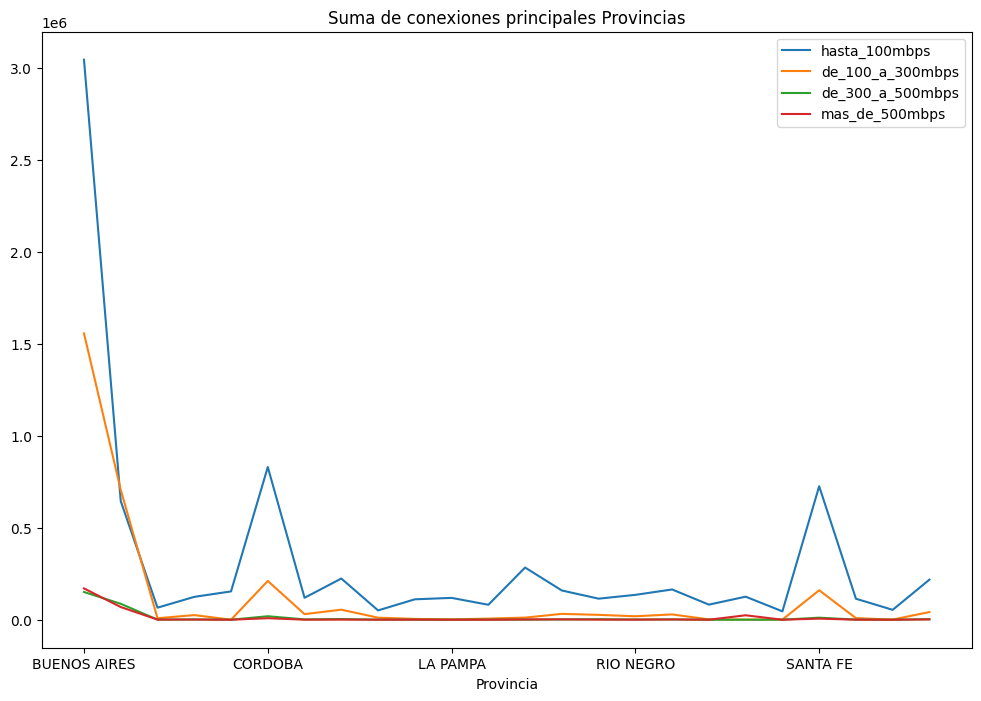

In [313]:
#grafico el detalle por provincia
grouped_df.sum().plot(figsize=(12,8), title= "Suma de conexiones principales Provincias")

Se puede observar en lineas generales una preponderancia por la conectividad por velocidades de hasta 100Mbps seguida por de 100 a 300Mbps y una clara acumulacion de conexiones desde Buenos Aires 

## Ponderacion por provincias

In [314]:
provincias = grouped_df.sum()

<Axes: ylabel='mas_de_500mbps'>

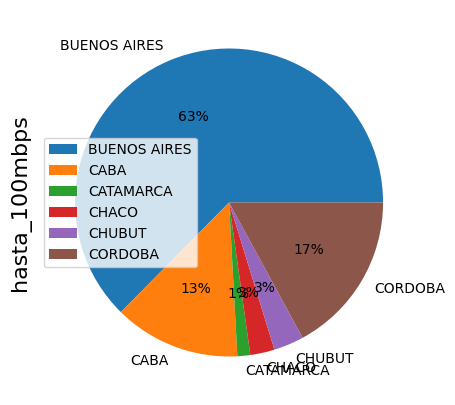

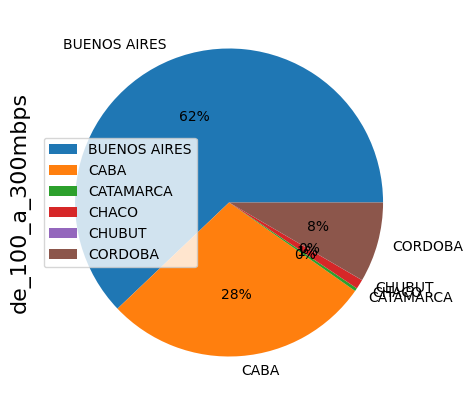

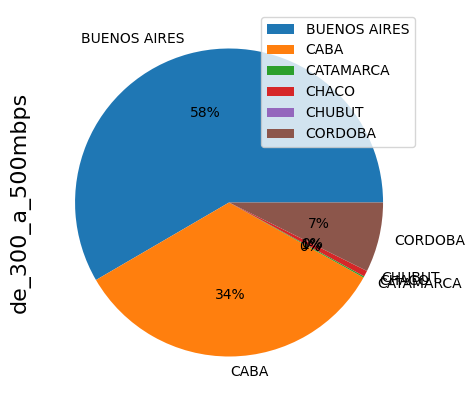

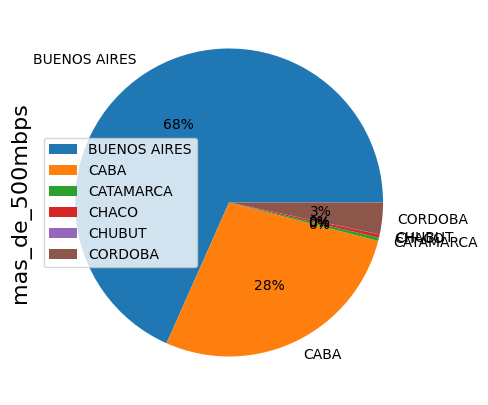

In [319]:
plt.rc('axes', labelsize=16, titlesize=16)
provincias[0:6].plot(kind='pie', y= 'hasta_100mbps', figsize=(5,5),autopct='%.0f%%')
provincias[0:6].plot(kind='pie', y= 'de_100_a_300mbps', figsize=(5,5),autopct='%.0f%%')
provincias[0:6].plot(kind='pie', y= 'de_300_a_500mbps', figsize=(5,5),autopct='%.0f%%')
provincias[0:6].plot(kind='pie', y= 'mas_de_500mbps', figsize=(5,5),autopct='%.0f%%')

Se puede notar una importante predominancia de conexiones desde Buenos Aires y CABA

# 3_ Analisis del dataframe Accesos_tecnologia_localidad :

In [320]:
df_Accesos_tecnologia_localidad

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,755,4600,0,2,0,742,0,727,6826
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,0,0,0,10,1,0,0,192
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0,0,0,0,0,0,0,181,181
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,0,782,0,496,16,0,0,185,1479
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,0,0,0,0,0,0,0,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3347,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0
3348,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0
3349,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0
3350,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0


## Tratamiento de valores NAN

In [321]:
#Eliminamos las filas con valores NAN
df_Accesos_tecnologia_localidad = df_Accesos_tecnologia_localidad.dropna(axis=0)

In [322]:
df_Accesos_tecnologia_localidad

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,755,4600,0,2,0,742,0,727,6826
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,0,0,0,10,1,0,0,192
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0,0,0,0,0,0,0,181,181
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,0,782,0,496,16,0,0,185,1479
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,0,0,0,0,0,0,0,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3067,TUCUMAN,Tafí Viejo,Villa Mariano Moreno - El Colmenar,90105100,0,0,0,7422,0,0,0,0,7422
3068,TUCUMAN,Trancas,San Pedro de Colalao,90112020,0,0,0,0,0,0,0,424,424
3069,TUCUMAN,Trancas,Villa de Trancas,90112030,95,0,0,0,33,0,0,71,199
3070,TUCUMAN,Yerba Buena,Villa Carmela,90119020,636,0,0,0,1,0,0,79,716


### Preparo para graficas

In [323]:
dfp = df_Accesos_tecnologia_localidad.drop(['OTROS', 'Localidad', 'Partido', 'Link Indec', 'Total general'], axis=1)

In [324]:
#Agrupo por provincia para graficar
grouped_df = dfp.groupby('Provincia')
grouped_df.sum()

,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,SATELITAL,WIMAX,WIRELESS
Provincia,,,,,,,
BUENOS AIRES,203297,2790663,5900,1799013,1061,1682,150290
CABA,70108,1177475,2050,203756,67,0,4493
CATAMARCA,5901,11025,1,56542,79,0,1384
CHACO,11343,58929,5,64463,76,0,8404
CHUBUT,26306,77217,857,26356,167,0,30867
CORDOBA,102812,449784,63,458985,95,71,61121
CORRIENTES,18390,85595,3,38268,77,59,10409
ENTRE RIOS,36574,158283,20,66180,24,224,23950
FORMOSA,9147,18631,0,17908,53,0,16851


array([<Axes: title={'center': 'ADSL'}, xlabel='Provincia'>,
       <Axes: title={'center': 'CABLEMODEM'}, xlabel='Provincia'>,
       <Axes: title={'center': 'DIAL UP'}, xlabel='Provincia'>,
       <Axes: title={'center': 'FIBRA OPTICA'}, xlabel='Provincia'>,
       <Axes: title={'center': 'SATELITAL'}, xlabel='Provincia'>,
       <Axes: title={'center': 'WIMAX'}, xlabel='Provincia'>,
       <Axes: title={'center': 'WIRELESS'}, xlabel='Provincia'>],
      dtype=object)

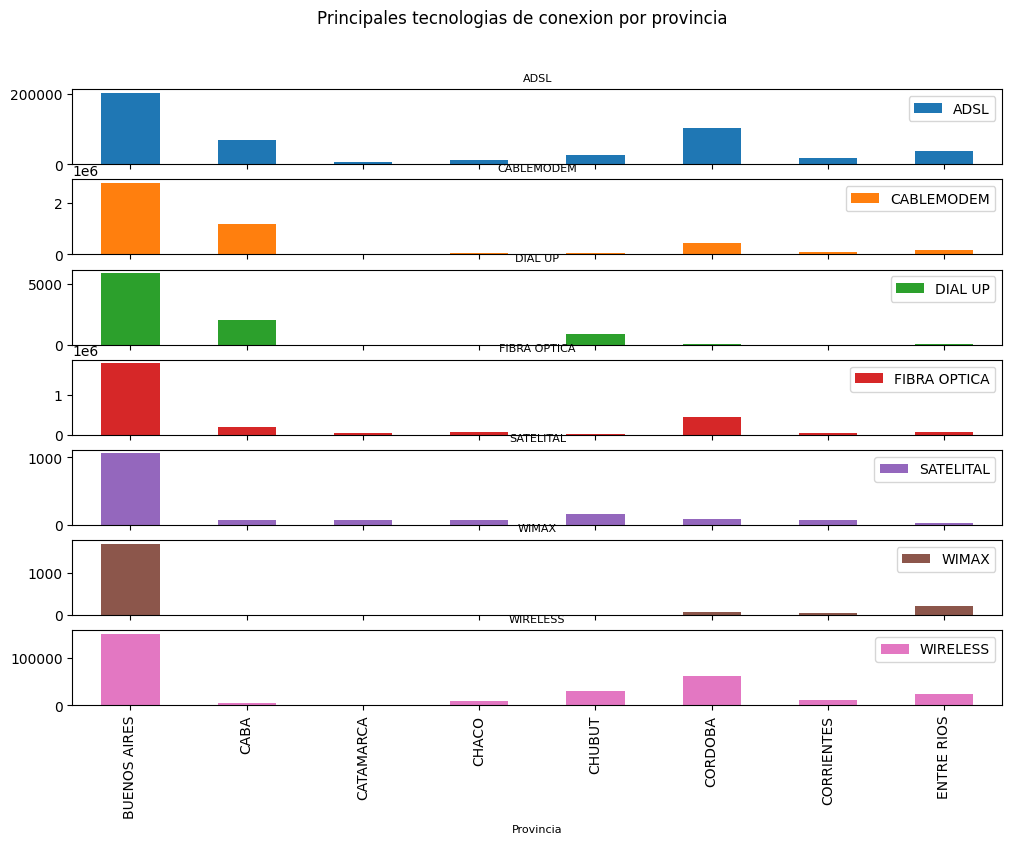

In [325]:
plt.rc('axes', labelsize=8, titlesize=8)
grouped_df.sum()[0:8].plot(kind='bar',
          subplots=True, 
          figsize=(12,8), 
          title = 'Principales tecnologias de conexion por provincia', 
          fontsize = 10)

#### De los graficos se puede observar que Buenos Aires es la provincia que predomina en conexiones por cada tecnologia seguido por CABA excepto en las tecnologias SATELITAL , WIMAX y WIRELESS

# 4_ Analisis del dataframe Velocidad por prov:

In [326]:
df_Velocidad_p_por_prov

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2024,1,Buenos Aires,159.130000
1,2024,1,Capital Federal,229.940000
2,2024,1,Catamarca,91.450000
3,2024,1,Chaco,107.510000
4,2024,1,Chubut,20.500000
...,...,...,...,...
979,2014,1,Santa Cruz,3.315991
980,2014,1,Santa Fe,3.147407
981,2014,1,Santiago Del Estero,2.949472
982,2014,1,Tierra Del Fuego,3.446888


In [327]:
df_Velocidad_p_por_prov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     984 non-null    int64  
 1   Trimestre               984 non-null    int64  
 2   Provincia               984 non-null    object 
 3   Mbps (Media de bajada)  984 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 30.9+ KB


### Tratamiento de NANs

* Como se puede notar no contiene valores nulos

In [328]:
#Solo se cuenta con la info del primer trimestre del 2024, 
# por lo que para ver una evolucion nos quedamos solo con la info del 1er Trimestre de cada año
df_Velocidad_p_por_prov = df_Velocidad_p_por_prov[df_Velocidad_p_por_prov['Trimestre']== 1]
df_Velocidad_p_por_prov

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2024,1,Buenos Aires,159.130000
1,2024,1,Capital Federal,229.940000
2,2024,1,Catamarca,91.450000
3,2024,1,Chaco,107.510000
4,2024,1,Chubut,20.500000
...,...,...,...,...
979,2014,1,Santa Cruz,3.315991
980,2014,1,Santa Fe,3.147407
981,2014,1,Santiago Del Estero,2.949472
982,2014,1,Tierra Del Fuego,3.446888


In [329]:
df_Velocidad_p_por_prov = df_Velocidad_p_por_prov.drop(['Trimestre'], axis=1)

In [330]:
df_Velocidad_2024 = df_Velocidad_p_por_prov[df_Velocidad_p_por_prov['Año']==2024]
df_Velocidad_2024 = df_Velocidad_2024.drop(['Año'], axis=1)

In [331]:
df_Velocidad_2024.sort_values('Mbps (Media de bajada)',ascending=True)[-5:]

,Provincia,Mbps (Media de bajada)
3,Chaco,107.51
5,Córdoba,114.89
0,Buenos Aires,159.13
18,San Luis,179.49
1,Capital Federal,229.94


<Axes: title={'center': 'Top 6 Provincias con mayor velocidad'}, ylabel='Provincia'>

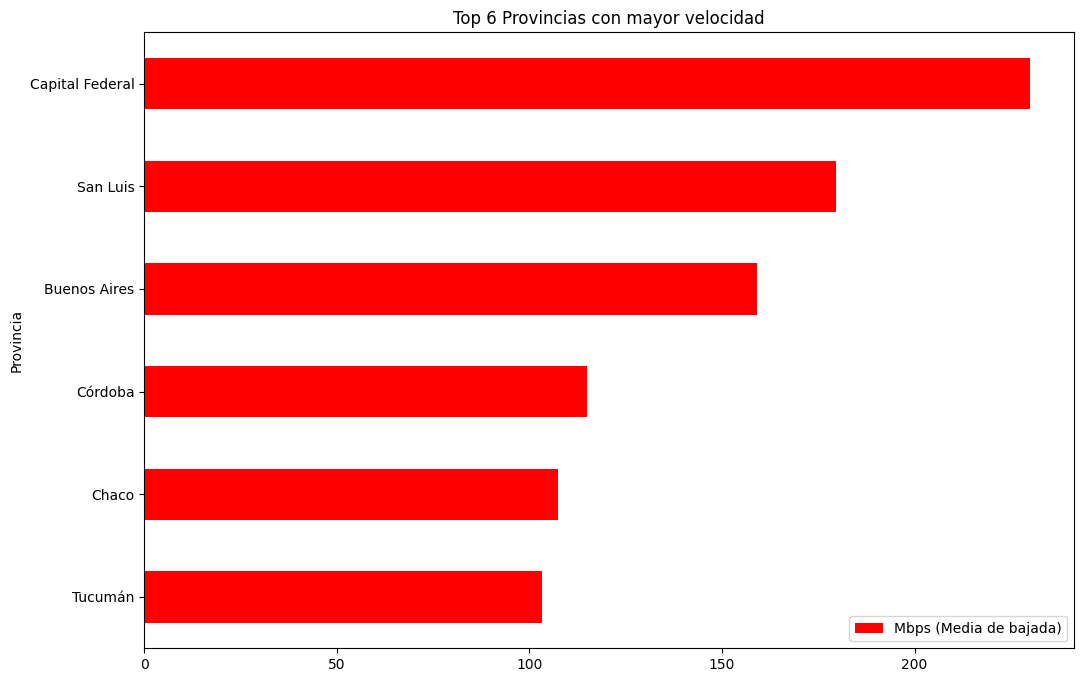

In [176]:
df_Velocidad_2024.sort_values('Mbps (Media de bajada)',ascending=True)[-6:].plot(kind='barh', 
                                                                                x='Provincia', 
                                                                                figsize =(12,8),
                                                                                title="Top 6 Provincias con mayor velocidad",
                                                                                color='red'
                                                                                )


### Como se puede observar las mayores velocidades para el 2024 se pueden encontrar en Capital Federal, San Luis, Buenos Aires y Cordoba respectivamente

# 5_ Analisis del dataframe TOTALES_VMD :

In [333]:
df_Totales_VMD 

,Año,Trimestre,Mbps (Media de bajada),Trimestre.1
0,2024,1,139.150000,Ene-Mar 2024
1,2023,4,139.040000,Oct-Dic 2023
2,2023,3,129.670000,Jul-Sept 2023
3,2023,2,123.950000,Abr-Jun 2023
4,2023,1,110.500000,Ene-Mar 2023
5,2022,4,106.560000,Oct-Dic 2022
6,2022,3,62.460000,Jul-Sept 2022
7,2022,2,58.440000,Abr-Jun 2022
8,2022,1,55.110000,Ene-Mar 2022
9,2021,4,52.340000,Oct-Dic 2021


In [334]:
#Solo se cuenta con la info del primer trimestre del 2024, 
# por lo que para ver una evolucion nos quedamos solo con la info del 1er Trimestre de cada año
df_Totales_VMD = df_Totales_VMD[df_Totales_VMD['Trimestre']== 1]
df_Totales_VMD

,Año,Trimestre,Mbps (Media de bajada),Trimestre.1
0,2024,1,139.150000,Ene-Mar 2024
4,2023,1,110.500000,Ene-Mar 2023
8,2022,1,55.110000,Ene-Mar 2022
12,2021,1,43.110000,Ene-Mar 2021
16,2020,1,37.520000,Ene-Mar 2020
20,2019,1,17.380000,Ene-Mar 2019
24,2018,1,13.221340,Ene-Mar 2018
28,2017,1,6.624079,Ene-Mar 2017
32,2016,1,5.083702,Ene-Mar 2016
36,2015,1,4.350279,Ene-Mar 2015


*Con este filtro las columnas Trimestre y Trimestre.1 se vuelven redundantes

In [335]:
df_Totales_VMD = df_Totales_VMD.drop(['Trimestre','Trimestre.1'], axis=1)
df_Totales_VMD

,Año,Mbps (Media de bajada)
0,2024,139.150000
4,2023,110.500000
8,2022,55.110000
12,2021,43.110000
16,2020,37.520000
20,2019,17.380000
24,2018,13.221340
28,2017,6.624079
32,2016,5.083702
36,2015,4.350279


<Axes: title={'center': 'Evolucion de velocidades de conexion segun años'}, xlabel='Año'>

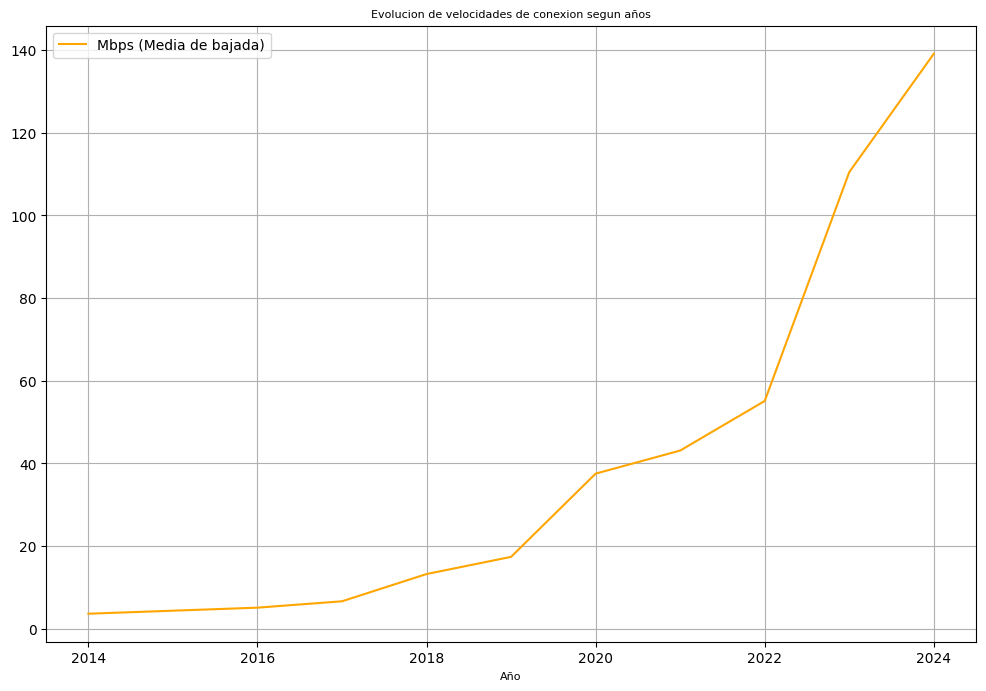

In [336]:
df_Totales_VMD.plot(x='Año', 
                    grid=True, 
                    figsize=(12,8), 
                    color= 'orange',
                    title="Evolucion de velocidades de conexion segun años"
                    )

* Se puede observar que la curva de velocidad avanza de manera lineal hasta el 2017 para luego desde ahi tomar un comportamiento exponencial

# 6_ Analisis del Totales Accesos por tecnologias:

In [337]:
df_Totales_Accesos_Por_Tecnología

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2024,1,774475,5986957,4015101,598682,257941,11633156,Ene-Mar 2024
1,2023,4,836390,6022532,3908183,585760,194796,11547661,Oct-Dic 2023
2,2023,3,897895,6018832,3708718,581436,200027,11406908,Jul-Sept 2023
3,2023,2,1006509,5997149,3463988,581823,202428,11251897,Abr-Jun 2023
4,2023,1,1204417,6002582,3243411,576647,214838,11241895,Ene-Mar 2023
5,2022,4,1315373,6037457,3060575,572969,221740,11208114,Oct-Dic 2022
6,2022,3,1395277,6031970,2871541,557110,235230,11091128,Jul-Sept 2022
7,2022,2,1468333,5979214,2723285,556243,231609,10958684,Abr-Jun 2022
8,2022,1,1533240,6073426,2219533,545814,251996,10624009,Ene-Mar 2022
9,2021,4,1657615,5984240,2072236,523107,252596,10489794,Oct-Dic 2021


In [338]:
df_Totales_Accesos_Por_Tecnología.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           41 non-null     int64 
 1   Trimestre     41 non-null     int64 
 2   ADSL          41 non-null     int64 
 3   Cablemodem    41 non-null     int64 
 4   Fibra óptica  41 non-null     int64 
 5   Wireless      41 non-null     int64 
 6   Otros         41 non-null     int64 
 7   Total         41 non-null     int64 
 8   Periodo       41 non-null     object
dtypes: int64(8), object(1)
memory usage: 3.0+ KB


### Tratamiento de NANs

* Como se puede observar el Dataframe no contiene datos nulos

In [339]:
#Solo se cuenta con la info del primer trimestre del 2024, 
# por lo que para ver una evolucion nos quedamos solo con la info del 1er Trimestre de cada año
df_Totales_Accesos_Por_Tecnología = df_Totales_Accesos_Por_Tecnología[df_Totales_Accesos_Por_Tecnología['Trimestre']== 1]
df_Totales_Accesos_Por_Tecnología

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2024,1,774475,5986957,4015101,598682,257941,11633156,Ene-Mar 2024
4,2023,1,1204417,6002582,3243411,576647,214838,11241895,Ene-Mar 2023
8,2022,1,1533240,6073426,2219533,545814,251996,10624009,Ene-Mar 2022
12,2021,1,2175211,5424782,1362976,434548,250455,9647972,Ene-Mar 2021
16,2020,1,2299457,4903674,1047817,352333,209145,8812426,Ene-Mar 2020
20,2019,1,3132789,4435439,637099,276419,166389,8648135,Ene-Mar 2019
24,2018,1,3574294,3981129,217460,165300,98870,8037053,Ene-Mar 2018
28,2017,1,3708898,3276251,180146,84813,55746,7305854,Ene-Mar 2017
32,2016,1,3792493,2806359,164371,85370,58763,6907356,Ene-Mar 2016
36,2015,1,3756153,2668248,168188,79098,66045,6737732,Ene-Mar 2015


*Con este filtro las columnas Trimestre y Periodo se vuelven redundantes

In [340]:
df_Totales_Accesos_Por_Tecnología =df_Totales_Accesos_Por_Tecnología.drop(['Trimestre','Periodo','Otros','Total'], axis=1)
df_Totales_Accesos_Por_Tecnología

,Año,ADSL,Cablemodem,Fibra óptica,Wireless
0,2024,774475,5986957,4015101,598682
4,2023,1204417,6002582,3243411,576647
8,2022,1533240,6073426,2219533,545814
12,2021,2175211,5424782,1362976,434548
16,2020,2299457,4903674,1047817,352333
20,2019,3132789,4435439,637099,276419
24,2018,3574294,3981129,217460,165300
28,2017,3708898,3276251,180146,84813
32,2016,3792493,2806359,164371,85370
36,2015,3756153,2668248,168188,79098


<Axes: title={'center': 'Evolucion de accesos por tecnologia'}, xlabel='Año'>

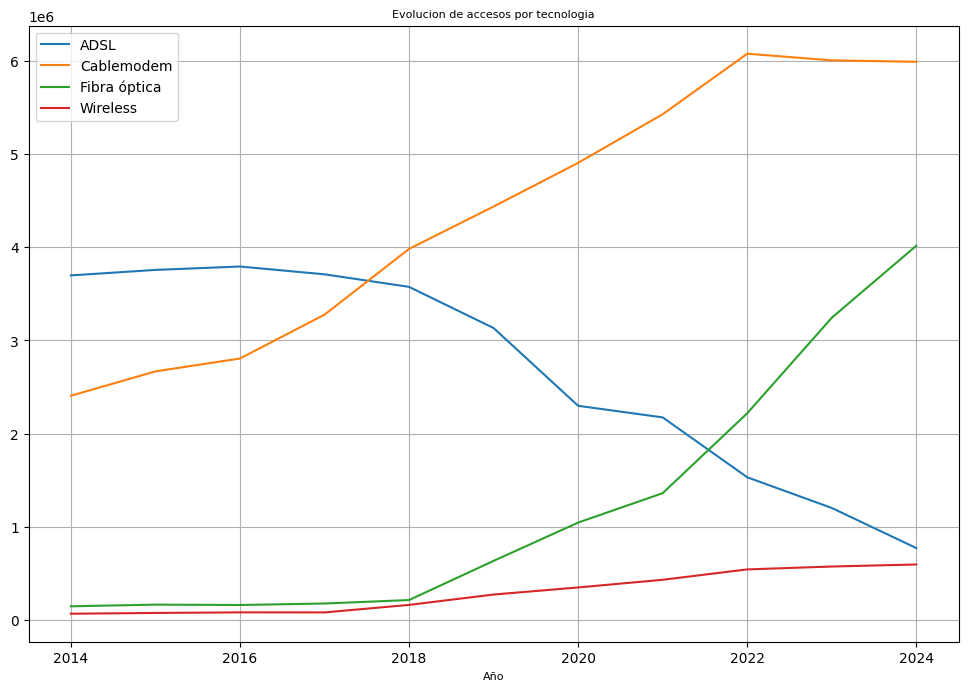

In [341]:
df_Totales_Accesos_Por_Tecnología.plot(x='Año', 
                                       grid=True, 
                                       figsize=(12,8), 
                                       title="Evolucion de accesos por tecnologia"
                                        )

### Del siguiente grafico se puede llegar a las siguientes deducciones:  
*   La tecnologia CABLEMODEM es la que al primer trimestre del 2024 presenta mayor numero de accesos, la misma presenta un movimiento lateral desde el 2022  
*   La tecnologia ADSL era la de mayor numero de accesos en el 2014 , luego del 216 presenta una baja logaritmica
*   Fibra Optica es la tecnologia con mayor tasa de creciemiento desde el 2021 se pudiera sugerir que dentro de unos años podria superar al CABLEMODEM  
*   La tecnologia Wireless presenta un comportamiento lateral con tendencia levemente positiva


# 10_ Analisis del dataframe Penetracion_totales :

In [342]:
df_Penetracion_totales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           41 non-null     int64  
 1   Trimestre                     41 non-null     int64  
 2   Accesos por cada 100 hogares  41 non-null     float64
 3   Accesos por cada 100 hab      41 non-null     float64
 4   Periodo                       41 non-null     object 
dtypes: float64(2), int64(2), object(1)
memory usage: 1.7+ KB


In [343]:
#Solo se cuenta con la info del primer trimestre del 2024, 
# por lo que para ver una evolucion nos quedamos solo con la info del 1er Trimestre de cada
df_Penetracion_totales = df_Penetracion_totales[df_Penetracion_totales['Trimestre']== 1]
df_Penetracion_totales

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2024,1,78.890000,24.790000,Ene-Mar 2024
4,2023,1,77.200000,24.170000,Ene-Mar 2023
8,2022,1,73.878803,23.049171,Ene-Mar 2022
12,2021,1,67.945876,21.127832,Ene-Mar 2021
16,2020,1,62.856361,19.483265,Ene-Mar 2020
20,2019,1,62.479166,19.307907,Ene-Mar 2019
24,2018,1,58.820000,18.120000,Ene-Mar 2018
28,2017,1,54.162116,16.644565,Ene-Mar 2017
32,2016,1,51.845452,15.901802,Ene-Mar 2016
36,2015,1,51.364586,15.677234,Ene-Mar 2015


In [344]:
df_Penetracion_totales = df_Penetracion_totales.drop(['Trimestre', 'Periodo'], axis=1)

## Tratamiento de NANs:

* Como se puede notar el dataframe no contiene datos nulos

<Axes: title={'center': 'Evolución de conectividad por año'}, xlabel='Año'>

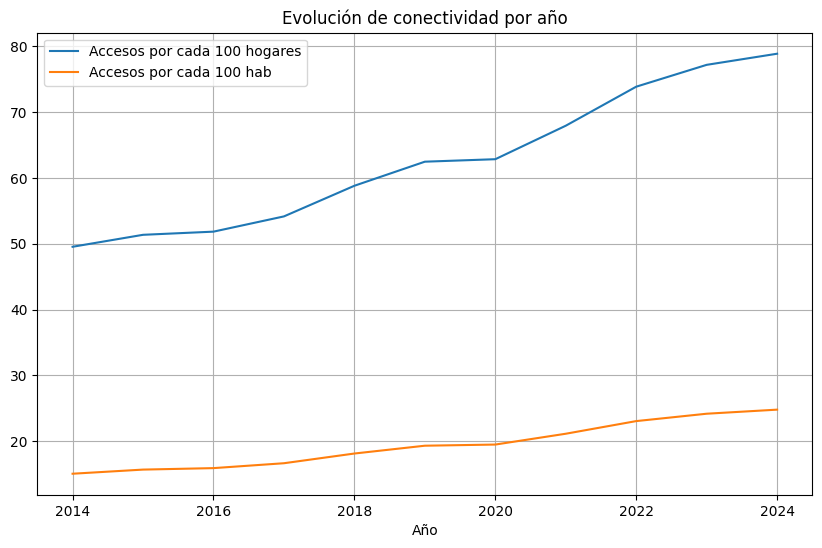

In [345]:
plt.rc('axes', labelsize=10, titlesize=12)
df_Penetracion_totales.plot(x='Año', figsize=(10,6), grid=True, title = 'Evolución de conectividad por año')

# 15_ Analisis del dataframe Ingresos:

In [346]:
df_Ingresos_ 

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2024,1,2.804191e+08,Ene-Mar 2024
1,2023,4,1.673760e+08,Oct-Dic 2023
2,2023,3,1.331066e+08,Jul-Sept 2023
3,2023,2,1.180603e+08,Jun-Mar 2023
4,2033,1,1.041350e+08,Ene-Mar 2023
5,2022,4,7.244348e+07,Oct-Dic 2022
6,2022,3,6.408678e+07,Jul-Sept 2022
7,2022,2,6.041950e+07,Abr-Jun 2022
8,2022,1,5.521931e+07,Ene-Mar 2022
9,2021,4,4.546789e+07,Oct-Dic 2021


In [347]:
df_Ingresos_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Año                        41 non-null     int64  
 1   Trimestre                  41 non-null     int64  
 2   Ingresos (miles de pesos)  41 non-null     float64
 3   Periodo                    41 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ KB


## Tratamiento de NANs:

* Como se puede notar el dataframe no contiene datos nulos

In [348]:
#Solo se cuenta con la info del primer trimestre del 2024, 
# por lo que para ver una evolucion nos quedamos solo con la info del 1er Trimestre de cada año
df_Ingresos_ = df_Ingresos_[df_Ingresos_['Trimestre']== 1]
df_Ingresos_

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2024,1,2.804191e+08,Ene-Mar 2024
4,2033,1,1.041350e+08,Ene-Mar 2023
8,2022,1,5.521931e+07,Ene-Mar 2022
12,2021,1,3.667637e+07,Ene-Mar 2021
16,2020,1,2.994622e+07,Ene-Mar 2020
20,2019,1,2.020741e+07,Ene-Mar 2019
24,2018,1,1.317146e+07,Ene-Mar 2018
28,2017,1,8.701201e+06,Ene-Mar 2017
32,2016,1,5.936845e+06,Ene-Mar 2016
36,2015,1,4.876385e+06,Ene-Mar 2015


In [349]:
df_Ingresos_ =df_Ingresos_.drop(['Trimestre','Periodo'], axis=1)
df_Ingresos_

,Año,Ingresos (miles de pesos)
0,2024,2.804191e+08
4,2033,1.041350e+08
8,2022,5.521931e+07
12,2021,3.667637e+07
16,2020,2.994622e+07
20,2019,2.020741e+07
24,2018,1.317146e+07
28,2017,8.701201e+06
32,2016,5.936845e+06
36,2015,4.876385e+06


<Axes: title={'center': 'Ingresos Miles de pesos'}, xlabel='Año'>

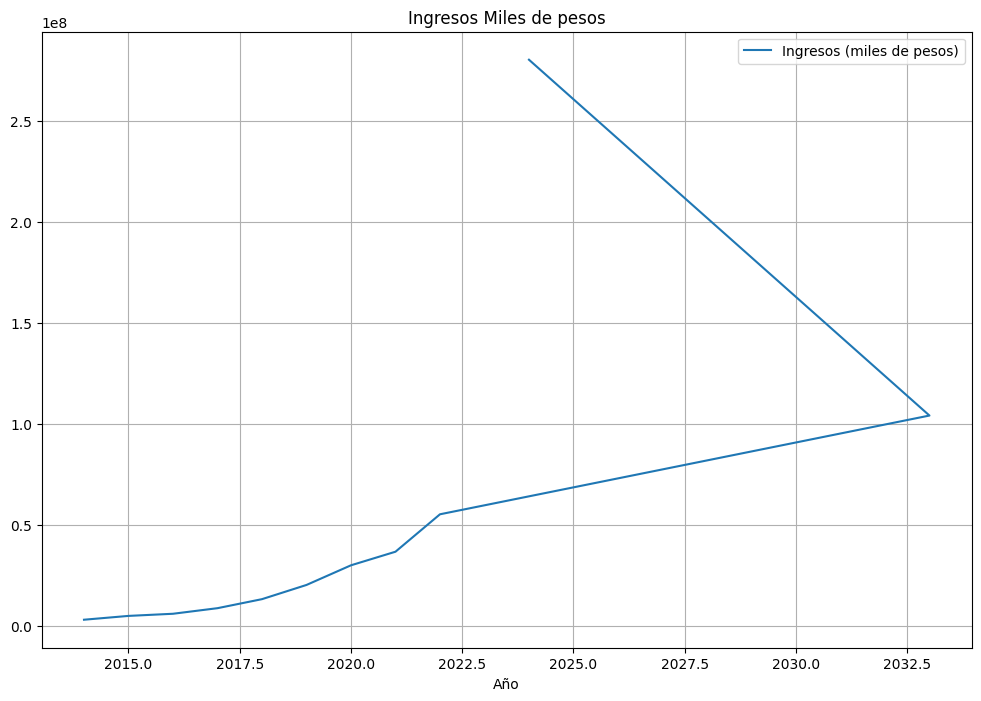

In [350]:
df_Ingresos_.plot(x='Año', 
                  grid=True, 
                  figsize=(12,8), 
                  title="Ingresos Miles de pesos"
                  )

*se puede observar un comportamiento no esperado en el grafico

In [351]:
#observamos el detalle de la columna años
df_Ingresos_['Año'].unique()

array([2024, 2033, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014],
      dtype=int64)

*consideramos que el año 2033 en realidad corresponde a los valores del año 2023

In [352]:
#forzamos el cambio al nuevo valor
#df_Ingresos_['Año'].iloc[1] = 2023 #Warnings
df_Ingresos_.loc[4, "Año"] = 2023

<Axes: title={'center': 'Ingresos Miles de pesos'}, xlabel='Año'>

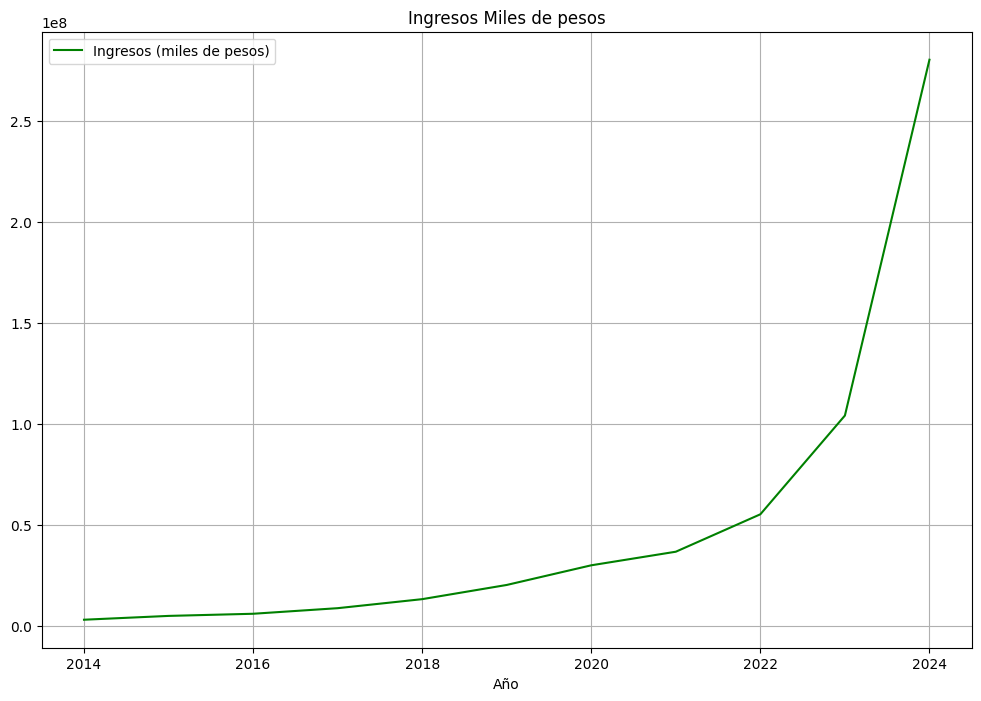

In [353]:
df_Ingresos_.plot(x='Año', 
                  grid=True, 
                  figsize=(12,8), 
                  title="Ingresos Miles de pesos",
                  color='green'
                  )

### Consideramos contrastar su evolucion en USD

fuente:  
https://www.bcra.gob.ar/PublicacionesEstadisticas/Planilla_cierre_de_cotizaciones.asp

In [354]:
dfcotizacion = pd.read_excel('cotizacion_dolar.xlsx')
dfcotizacion

,Año,Vendedor,Comprador
0,2024-02-01,871.925,815569
1,2023-02-01,194.955,186314
2,2022-02-01,110.754,104410
3,2021-02-01,92.985,86740
4,2020-02-03,63.054,58152
5,2019-02-01,38.307,36348
6,2018-02-01,19.707,19193
7,2017-02-01,16.049,15686
8,2016-02-01,14.273,13901
9,2015-02-02,8.707,8597


In [356]:
dfcotizacion['Año'] = pd.to_datetime(dfcotizacion['Año']).dt.year
dfcotizacion = dfcotizacion.drop('Comprador', axis=1) #Tomamos el tipo de cambio vendedor ya que es la moneda de cambio de los usuarios

In [357]:
dfcotizacion

,Año,Vendedor
0,2024,871.925
1,2023,194.955
2,2022,110.754
3,2021,92.985
4,2020,63.054
5,2019,38.307
6,2018,19.707
7,2017,16.049
8,2016,14.273
9,2015,8.707


In [358]:
merged_df = pd.merge(df_Ingresos_, dfcotizacion, on='Año', how='inner')
merged_df

,Año,Ingresos (miles de pesos),Vendedor
0,2024,2.804191e+08,871.925
1,2023,1.041350e+08,194.955
2,2022,5.521931e+07,110.754
3,2021,3.667637e+07,92.985
4,2020,2.994622e+07,63.054
5,2019,2.020741e+07,38.307
6,2018,1.317146e+07,19.707
7,2017,8.701201e+06,16.049
8,2016,5.936845e+06,14.273
9,2015,4.876385e+06,8.707


In [359]:
merged_df['Ingresos_USD'] = (merged_df['Ingresos (miles de pesos)']*1000) / merged_df['Vendedor'] 

In [360]:
merged_df

,Año,Ingresos (miles de pesos),Vendedor,Ingresos_USD
0,2024,2.804191e+08,871.925,3.216092e+08
1,2023,1.041350e+08,194.955,5.341489e+08
2,2022,5.521931e+07,110.754,4.985762e+08
3,2021,3.667637e+07,92.985,3.944332e+08
4,2020,2.994622e+07,63.054,4.749297e+08
5,2019,2.020741e+07,38.307,5.275123e+08
6,2018,1.317146e+07,19.707,6.683645e+08
7,2017,8.701201e+06,16.049,5.421647e+08
8,2016,5.936845e+06,14.273,4.159493e+08
9,2015,4.876385e+06,8.707,5.600534e+08


In [361]:
df_Ingresos_USD = merged_df.drop('Vendedor', axis=1) 
df_Ingresos_USD

,Año,Ingresos (miles de pesos),Ingresos_USD
0,2024,2.804191e+08,3.216092e+08
1,2023,1.041350e+08,5.341489e+08
2,2022,5.521931e+07,4.985762e+08
3,2021,3.667637e+07,3.944332e+08
4,2020,2.994622e+07,4.749297e+08
5,2019,2.020741e+07,5.275123e+08
6,2018,1.317146e+07,6.683645e+08
7,2017,8.701201e+06,5.421647e+08
8,2016,5.936845e+06,4.159493e+08
9,2015,4.876385e+06,5.600534e+08


* Genero un archivo por separado

In [362]:
df_Acc_vel_loc_sinrangos.to_excel("Ingresos_USD.xlsx", index=False)

<Axes: title={'center': 'Ingresos comparacion tipo de cambio cada año'}, xlabel='Año'>

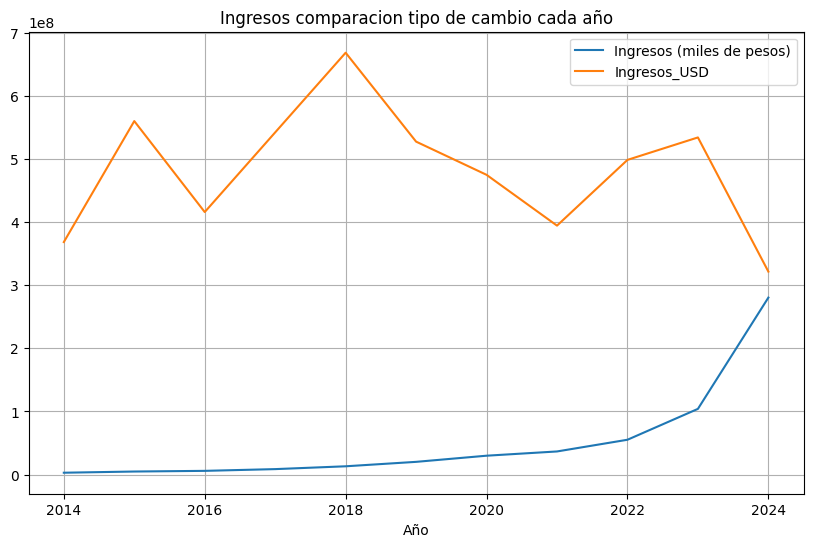

In [363]:
df_Ingresos_USD.plot(x='Año', 
                  grid=True, 
                  figsize=(10,6), 
                  title="Ingresos comparacion tipo de cambio cada año"
                  )